## **ICT2233 - Flujo en Redes**

Profesor: Homero Larraín Izquierdo (homero@uc.cl)

Ayudante responsable: Benjamín Rojas (bgrojas@uc.cl)

In [230]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

## Parte 1: Algunos algoritmos que están implementados en NetworkX

### 1.0. Generar un grafo dirigido y con capacidad

In [231]:
# Crear el grafo dirigido
G = nx.DiGraph()
G.add_node("A", demand=-5)
G.add_node("D", demand=5)
G.add_node("B")
G.add_node("C")
G.add_edge("A", "B", weight=3, capacity=4)
G.add_edge("A", "C", weight=6, capacity=10)
G.add_edge("B", "D", weight=1, capacity=9)
G.add_edge("C", "D", weight=2, capacity=5)

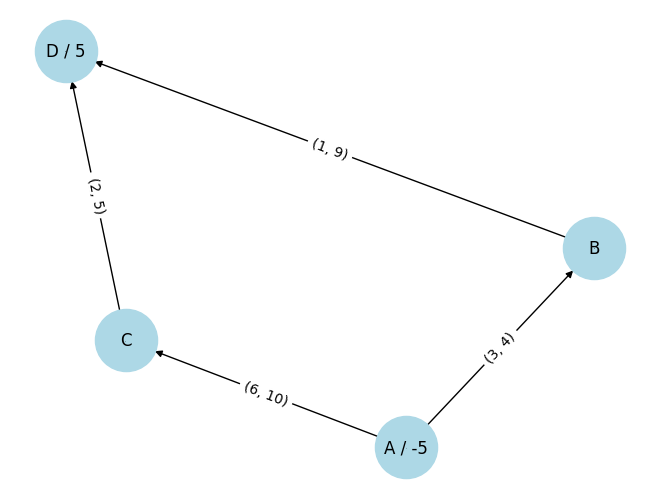

In [232]:
# Posicionar los nodos
pos = nx.spring_layout(G, seed = 78)

# Dibujar el grafo
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=0, arrows=True)

# Añadir etiquetas para las aristas (pesos y capacidades)
edge_labels = {(u, v): f'({d["weight"]}, {d["capacity"]})' for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black')

# Añadir etiquetas para las demandas en los nodos
node_labels = {}
for n, data in G.nodes(data=True):
    demand = data.get('demand', 'N/A')  # Usar 'N/A' si no hay demanda
    if demand != 'N/A':
        node_labels[n] = f"{n} / {demand}"
    else:
        node_labels[n] = f"{n}"

nx.draw_networkx_labels(G, pos, labels=node_labels, font_color='black')

# Mostrar el grafo
plt.show()

# OJO que por convencion acá la demanda es positiva (e.g. nodo D demanda 5 unidades) y la oferta es negativa (e.g. nodo A genera 5 unidades)

### 1.2 Simplex de redes

In [233]:
flowCost, flowDict = nx.network_simplex(G)
print(flowCost)
print(flowDict)

24
{'A': {'B': 4, 'C': 1}, 'D': {}, 'B': {'D': 4}, 'C': {'D': 1}}


### 1.3. Generar un grafo no dirigido

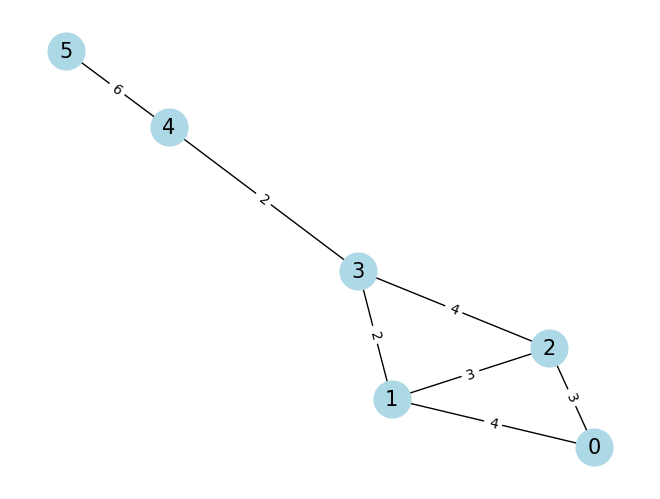

In [234]:
# Creamos el objeto grafo.
G = nx.Graph()

# Añadimos arcos con costos. La notación es: (nodo_inicial, nodo_final, costo).
G.add_weighted_edges_from([(0, 1, 4), (0, 2, 3), (1, 2, 3), (1, 3, 2), (2, 3, 4), (3, 4, 2), (4, 5, 6)])

# Dibujamos el grafo
pos = nx.spring_layout(G, seed=36)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=700, font_size=15)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)})
plt.show()

### 1.4. Algoritmo de Prim para definir un AMEM

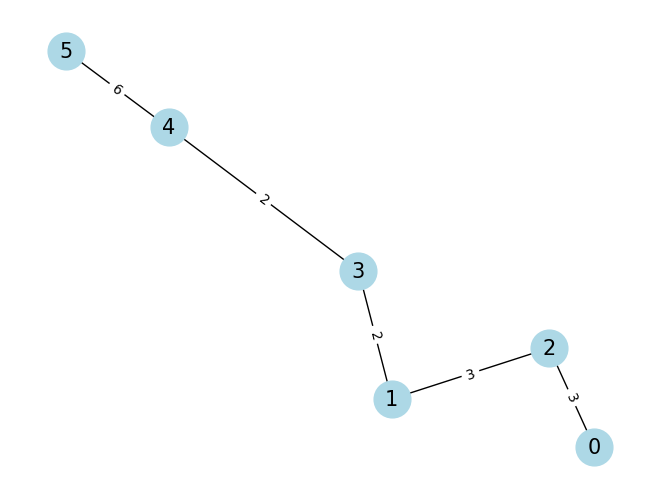

In [235]:
# Minimum spanning tree = AMEM
AMEM_G = nx.minimum_spanning_tree(G, algorithm='prim', weight='weight')
AMEM_G_costos = sum(d['weight'] for u, v, d in AMEM_G.edges(data=True))

# Dibujamos el grafo
nx.draw(AMEM_G, pos, with_labels=True, node_color='lightblue', node_size=700, font_size=15)
nx.draw_networkx_edge_labels(AMEM_G, pos, edge_labels={(u, v): d['weight'] for u, v, d in AMEM_G.edges(data=True)})
plt.show()

In [236]:
print(list(AMEM_G))
print(AMEM_G_costos)

[0, 1, 2, 3, 4, 5]
16


### 1.5. Algoritmo de Dijkstra para rutas mínimas s-t

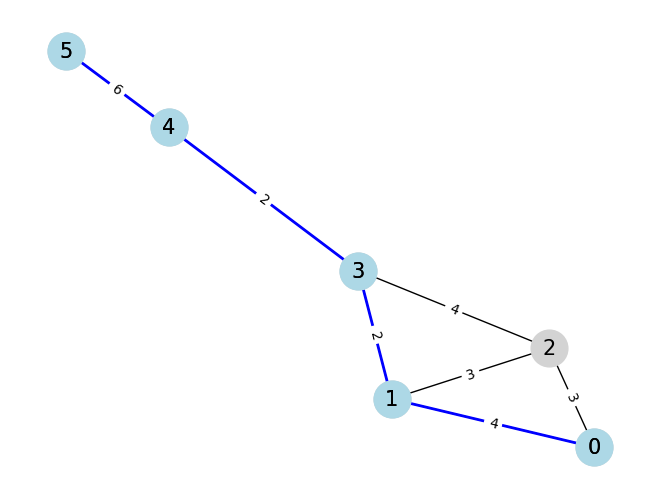

In [237]:
s = 0
t = 5
RM = nx.shortest_path(G, method = 'dijkstra', source=s, target=t, weight='weight')
RM_costo = nx.shortest_path_length(G, source=s, target=t, weight='weight')

# Creamos un subgrafo con solo el camino más corto
RM_G = nx.Graph()
path_edges = [(RM[i], RM[i + 1]) for i in range(len(RM) - 1)]
RM_G.add_edges_from(path_edges)

# Añadimos los pesos de las aristas al subgrafo
for u, v in path_edges:
    RM_G[u][v]['weight'] = G[u][v]['weight']

# Dibujamos el grafo original
nx.draw(G, pos, with_labels=True, node_color='lightgrey', node_size=700, font_size=15)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)})

# Dibujamos el camino más corto en azul
nx.draw(RM_G, pos, with_labels=True, edge_color='blue', width=2, node_color='lightblue', node_size=700, font_size=15)
nx.draw_networkx_edge_labels(RM_G, pos, edge_labels={(u, v): G[u][v]['weight'] for u, v in path_edges})
plt.show()


In [238]:
print(RM)
print(RM_costo)

[0, 1, 3, 4, 5]
14


### 1.6. Algoritmo de Dijkstra para arbol de rutas mínimas

In [239]:
# Calculamos todos los caminos más cortos entre pares de nodos usando los pesos
RM_all_pairs = dict(nx.all_pairs_dijkstra_path(G, weight='weight'))

# Calculamos los costos de los caminos más cortos entre pares de nodos usando los pesos
RM_all_pairs_costo = dict(nx.all_pairs_dijkstra_path_length(G, weight='weight'))

print("Rutas mínimas para todos los pares de nodos:")
for source, paths in RM_all_pairs.items():
    print(f"Desde el nodo {source}: {paths}")

print("\nCostos de las rutas mínimas para todos los pares de nodos:")
for source, costs in RM_all_pairs_costo.items():
    print(f"Desde el nodo {source}: {costs}")

Rutas mínimas para todos los pares de nodos:
Desde el nodo 0: {0: [0], 1: [0, 1], 2: [0, 2], 3: [0, 1, 3], 4: [0, 1, 3, 4], 5: [0, 1, 3, 4, 5]}
Desde el nodo 1: {1: [1], 0: [1, 0], 2: [1, 2], 3: [1, 3], 4: [1, 3, 4], 5: [1, 3, 4, 5]}
Desde el nodo 2: {2: [2], 0: [2, 0], 1: [2, 1], 3: [2, 3], 4: [2, 3, 4], 5: [2, 3, 4, 5]}
Desde el nodo 3: {3: [3], 1: [3, 1], 2: [3, 2], 4: [3, 4], 0: [3, 1, 0], 5: [3, 4, 5]}
Desde el nodo 4: {4: [4], 3: [4, 3], 5: [4, 5], 1: [4, 3, 1], 2: [4, 3, 2], 0: [4, 3, 1, 0]}
Desde el nodo 5: {5: [5], 4: [5, 4], 3: [5, 4, 3], 1: [5, 4, 3, 1], 2: [5, 4, 3, 2], 0: [5, 4, 3, 1, 0]}

Costos de las rutas mínimas para todos los pares de nodos:
Desde el nodo 0: {0: 0, 2: 3, 1: 4, 3: 6, 4: 8, 5: 14}
Desde el nodo 1: {1: 0, 3: 2, 2: 3, 0: 4, 4: 4, 5: 10}
Desde el nodo 2: {2: 0, 0: 3, 1: 3, 3: 4, 4: 6, 5: 12}
Desde el nodo 3: {3: 0, 1: 2, 4: 2, 2: 4, 0: 6, 5: 8}
Desde el nodo 4: {4: 0, 3: 2, 1: 4, 5: 6, 2: 6, 0: 8}
Desde el nodo 5: {5: 0, 4: 6, 3: 8, 1: 10, 2: 12, 0: 14}


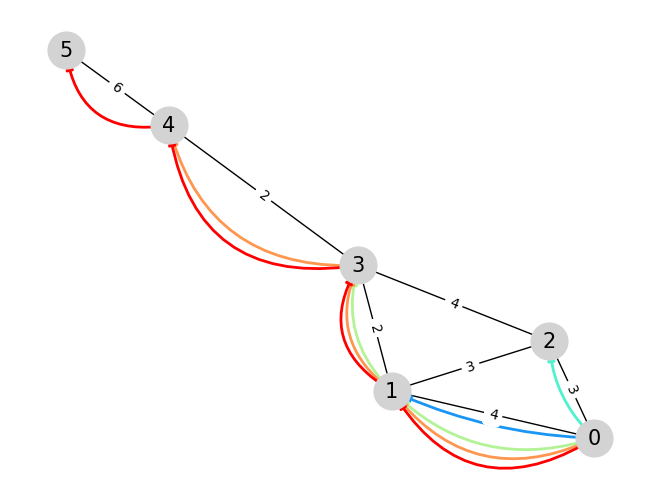

In [240]:
s = 0

# Creamos un grafo multidigrafo para visualizar arcos paralelos
M = nx.MultiDiGraph()

# Añadimos los caminos al MultiDiGraph con arcos paralelos
for target, path in RM_all_pairs[s].items():
    for i in range(len(path) - 1):
        u, v = path[i], path[i + 1]
        weight = G[u][v]['weight']
        M.add_edge(u, v, weight=weight, path=path)

# Dibujamos el grafo original en gris
nx.draw(G, pos, with_labels=True, node_color='lightgrey', node_size=700, font_size=15)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)})

# Dibujamos los caminos más cortos desde el nodo 0 en colores distintos para cada destino
colors = plt.cm.rainbow(np.linspace(0, 1, len(RM_all_pairs[s])))

cont = 0

for color, (target, path) in zip(colors, RM_all_pairs[s].items()):
    path_edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]

    # Etiquetas de los arcos
    nx.draw_networkx_edge_labels(M, pos, edge_labels={(u, v): G[u][v]['weight'] for u, v in path_edges})

    # Desplazamiento para arcos paralelos
    for i, (u, v) in enumerate(path_edges):
        nx.draw_networkx_edges(M, pos, edgelist=[(u, v)], edge_color=[color], width=2,
                                     connectionstyle='arc3,rad='+str(-0.1*cont))    
    cont +=1

plt.show()

In [241]:
(3) + (4) + (4+2) + (4+2+2) + + (4+2+2+6)

35

In [242]:
costo_total = 0
for j in range(s+1, t+1):
    costo_total += RM_all_pairs_costo[s][j]
costo_total

35

## Parte 2: Veamos una heurística sencilla para construir un camino s-t (que no siempre funciona)

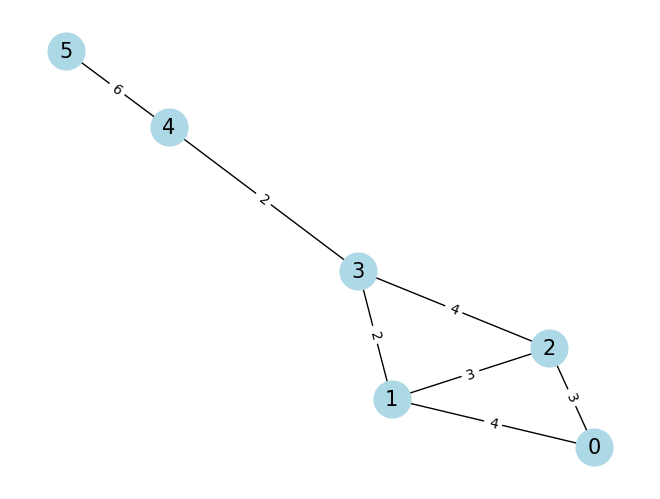

In [243]:
# Creamos el objeto grafo.
G = nx.Graph()

# Añadimos arcos con costos. La notación es: (nodo_inicial, nodo_final, costo).
G.add_weighted_edges_from([(0, 1, 4), (0, 2, 3), (1, 2, 3), (1, 3, 2), (2, 3, 4), (3, 4, 2), (4, 5, 6)])

# Dibujamos el grafo
pos = nx.spring_layout(G, seed=36)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=700, font_size=15)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)})
plt.show()

In [244]:
G.nodes(data = True)

NodeDataView({0: {}, 1: {}, 2: {}, 3: {}, 4: {}, 5: {}})

In [245]:
G.edges(data = True)

EdgeDataView([(0, 1, {'weight': 4}), (0, 2, {'weight': 3}), (1, 2, {'weight': 3}), (1, 3, {'weight': 2}), (2, 3, {'weight': 4}), (3, 4, {'weight': 2}), (4, 5, {'weight': 6})])

In [246]:
def NN(G, s, t):
    nodo_actual = s
    visitados = {nodo_actual}
    camino = [nodo_actual]
    
    while nodo_actual != t:
        vecinos = [(vecino, G[nodo_actual][vecino]['weight']) for vecino in G.neighbors(nodo_actual) if vecino not in visitados]
        
        if not vecinos:
            print("No se puede llegar al destino desde el nodo actual.")
            return None
        
        # Selecciona el vecino con el menor peso
        vecino_mas_cercano = min(vecinos, key=lambda x: x[1])[0]
        
        # Avanza al vecino más cercano
        nodo_actual = vecino_mas_cercano
        visitados.add(nodo_actual)
        camino.append(nodo_actual)
    
    return camino

In [247]:
# Ejemplo de uso
camino = NN(G, 0, 5)
print("Camino de vecino más cercano:", camino)

Camino de vecino más cercano: [0, 2, 1, 3, 4, 5]


### Veamos un ejemplo en donde esto no funciona

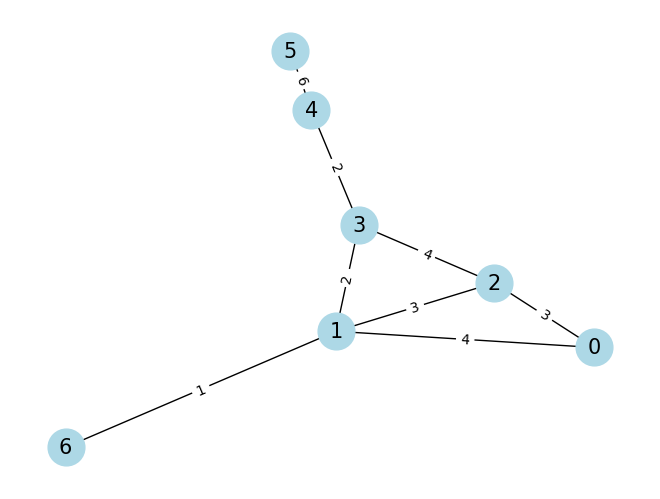

In [248]:
# Creamos el objeto grafo.
G = nx.Graph()

# Añadimos arcos con costos. La notación es: (nodo_inicial, nodo_final, costo).
G.add_weighted_edges_from([(0, 1, 4), (0, 2, 3), (1, 2, 3), (1, 3, 2), (2, 3, 4), (3, 4, 2), (4, 5, 6), (1,6,1)])

# Dibujamos el grafo
pos = nx.spring_layout(G, seed=36)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=700, font_size=15)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)})
plt.show()

In [249]:
# Ejemplo de uso
camino = NN(G, 0, 5)
print("Camino de vecino más cercano:", camino)

No se puede llegar al destino desde el nodo actual.
Camino de vecino más cercano: None


## EXTRA: Leer instancias

In [250]:
def read_graph_from_file(filename):
    graph = nx.read_gml(filename)
    new_labels = {node: int(node) for node in graph.nodes()}
    graph = nx.relabel_nodes(graph, new_labels)
    return graph

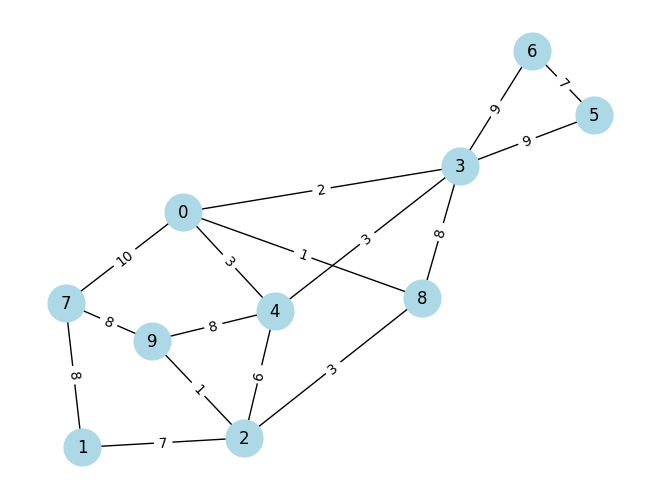

In [251]:
graph_filename = 'G10.gml'
G = read_graph_from_file(graph_filename)

# Dibujar el grafo
pos = nx.spring_layout(G, seed = 1)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=700)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()